# Training Models
This notebook is dedicated to chapter 4 of the book.

Exploring how models can be trained

## Linear Regression Model
### Definition
We can define the linear model as follows:
$$
\hat{y}=\theta_{0} + \theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n}
$$
Where:
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_{i}$ is the $x^{ith}$ feature value (i.e., the instance attribute values)
* $\theta_{j}$ is the $j^{th}$ model parameter including the bias term $\theta_0$ and the feature weights $\theta_1,\theta_2,\dots,\theta_n$

And in vectorized form:
$$
\hat{y}=h_{\theta}(X)=\theta^T \cdot X
$$
Where:
* $\hat{y}$ is again the predicted value
* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$, and the feature weights $\theta_1$ to $\theta_n$
* $\theta^T$ is the transpose of $\theta$, a row vector instead of a column vector.
* $X$ is the instance's *feature vector*, containing $x_0$ to $x_n$ **with $x_0$ always equal to $1$.**
* $\theta^TX$ is the dot product of $\theta^T$ and $X$
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$

### Metrics
A linear model consists on fitting the equation of a line (the model) on a series of data points that resembles a line. We are going to play with the model parameters, i.e., $\theta_{n}$ till we find a line that best fits the data. For doing this, we need a measure that tell us this. In this case, we can think of this measurement as the distance between each data point and the line we are fitting, the less the difference the better. This metric is called *Mean Squared Error* or *MSE*:

$$
MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)})^2
$$

This is basically, adding all the differences between the point in the line (predicted value) and the actual value then square it (to deal with negative values) and finaly averaging it depending on the number of samples.

This is then a Minimization problem as we want to find the values for $\theta_{n}$ such that minimizes the value of $MSE(\theta)$

### The normal equation
So the definition of this problem as a formula would be:
$$
\hat{\theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

### Visualization

In [1]:
import numpy as np

np.random.seed(12345)
# Generate 100 points, rand receives the dimensions of the returning vector,
# in this case, 100 rows and 1 column
X = 2 * np.random.rand(100, 1)
# This is basically applying the model 'y = 3x + 4' however, we are adding noise with a random normal distribution to simulate some dispersion in the data points
y = 4 + 3 * X + np.random.randn(100, 1)

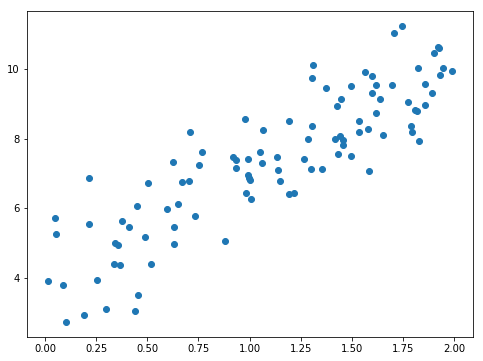

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.show()

Now, let's compute $\hat{\theta}$ using the normal function and with help of numpy's linear algebra packages to calculate the inverse of a matrix (-1 exponent) and the dot product.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[3.9801249 ],
       [3.05940348]])

Notice the actual values of the function we used to generate the data (+ Gaussian Noise) and look at what we obtained here, they resemble pretty well the original values, considering the noise off course.

Now, let's make predictions using these thetas as model parameters and plot the line and appreciate it graphically

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9801249 ],
       [10.09893186]])

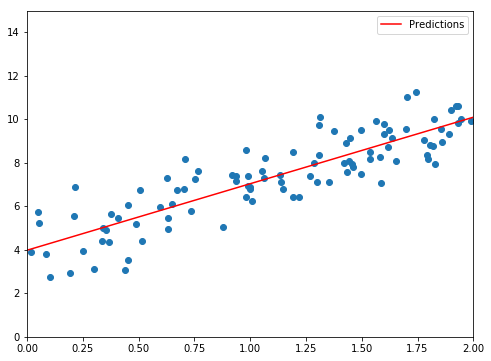

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15]) # X axis from 0 to 2, Y axis from 0 to 15
plt.legend(["Predictions"])
plt.show()

Equivalent code using scikit learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9801249]), array([[3.05940348]]))

### Notes:
This method works good for large number of samples, $O(m)$, but starts to perform poorly when the number of features grows. From $O(n^{2.4})$ to $O(n^3)$

## Gradient Descent
This technique consists in taken steps in the direction where the values of the cost functions become smaller. It's like going downhill, you might want to go in the steepest downward direction to get to the bottom.

The MSE cost function is like a bowl with a global minima, we can then, pick any point in the function and go in the direction where the value becomes smaller. The amount of each step is called *learning rate*, depending on the value, we can reach the global minima if we wait long enough for small step sizes.

![Gradient Descent](https://saugatbhattarai.com.np/wp-content/uploads/2018/06/gradient-descent-1.jpg)

### Important:
If we have features with different scales, the bowl can look enlongated, this means that reaching the minima might take a long time. I this particular case, this is one of the reasons why it's important to work with data under the same scale.

## Batch Gradient Descent
*To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a bit. **This is called partial derivative*** (Directly from the book)

The partial derivative of MAE with respect to $\theta$ is:
$$
\frac{\partial}{\partial\theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m} (\theta^{T} \cdot x^{(i)} - y^{(i)} ) x_j^{(i)}
$$

Now, we can compute all the partial derivatives, one for each model parameter and this will give us the gradient vector $\bigtriangledown_{\theta}MSE(\theta)$:

$$
\bigtriangledown_{\theta}MSE(\theta) = 
\begin{bmatrix}
\frac{\partial}{\partial_0} MSE(\theta) \\
\frac{\partial}{\partial_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial_n} MSE(\theta)
\end{bmatrix} = \frac{2}{m}X^T \cdot (X \cdot \theta - y)
$$

Notice this means we will be calculating the gradient in the whole data set X, this is why this method is very slow for large datasets. However scales well for a great number of features.

What the gradient vector tell us, is the direction where the function moves uphill. Since we want to go downhil, we just need to go to the opposite direction. To do this, we must substract $\bigtriangledown_{\theta}MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ is used. We need to multiply the learning rate by the gradient vector to get the size of the next downhill step.

$$
\theta^{(next step)}=\theta - \eta \bigtriangledown_{\theta} MSE(\theta)
$$

Now, let's look at a quick implementation of this algorithm:


In [7]:
def linear_regression_gd(X, y, eta=0.1, n_iterations=1000):
    """Trains a linear regression model with gradient descent.
    
    Keyword arguments:
    X -- features
    y -- target values
    eta -- the learning rate
    n_iterations -- the number of iterations
    """
    
    theta = np.random.rand(2,1) # random initialization, two parameters, theta0 and theta1
    m = X.shape[0] # number of samples
    
    for iteration in range(n_iterations):
        # applying the partial derivative of MSE, notice X_b.dot(theta) is equal to the predicted value xi
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        # here we update theta, the parameters, in the oposite direction of the gradient by the learning rate amount
        theta = theta - eta * gradients

    return theta

In [8]:
eta = 0.1 # learning rate
n_iterations = 1000

linear_regression_gd(X_b, y, eta, n_iterations)

array([[3.9801249 ],
       [3.05940348]])

We obtained the same model parameters as with the normal equation!

Gradient descent depends on the hyperparameters, *learning rate* and *# of iterations*. The model parameters are sensible to these values, let's see what happens if we use different values.

In [67]:
def linear_regression_gd_steps(X, y, eta, n_iterations=10):
    result = []
    for i in range(n_iterations):
        result.append(linear_regression_gd(X_b, y, eta, i + 1))
    return result
    
etas = {
    0.02: linear_regression_gd_steps(X_b, y, 0.02),
    0.1: linear_regression_gd_steps(X_b, y, 0.1),
    0.5: linear_regression_gd_steps(X_b, y, 0.5)
}

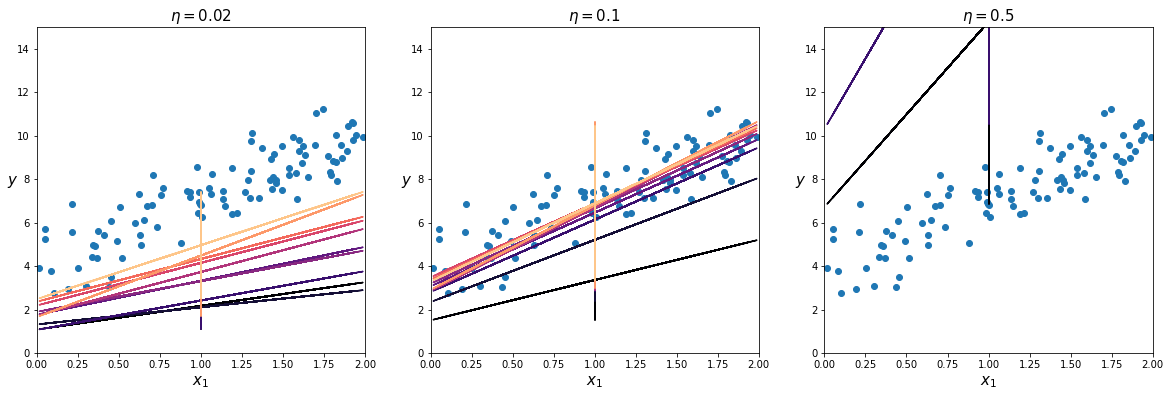

In [68]:
%matplotlib inline

def plot_iteration_evolution(X_b, y, eta):
    interval = int(len(plt.cm.magma.colors)/len(eta[1]))
    colors = plt.cm.magma.colors[::interval]
    color_iter = iter(colors)

    plt.scatter(X, y)
    plt.title("$\eta={}$".format(eta[0]), fontsize=15)
    plt.xlabel("$x_1$", fontsize=15)
    plt.ylabel("$y$", rotation=0, fontsize=15)
    plt.axis([0, 2, 0, 15])
    for theta in eta[1]:
        predictions = X_b.dot(theta)
        color = next(color_iter)
        plt.plot(X_b, predictions, color=color)
        

plt.figure(figsize=(20, 6))

for index, eta in enumerate(etas.items()):
    plt.subplot(1, 3, index + 1)
    plot_iteration_evolution(X_b, y, eta)

plt.show()

We can observe here the evolution of three different learning rates, the lighter the line the higher the number of iterations, (the dark line means is the first iteration).

* Notice with $0.02$ within 10 iterations it wasn't able to converge, however is consistently approximating to optimal solution.
* Notice with $0.1$ within 10 iterations converves really quick.
* Notice with $0.5$ within just 2 iterations not only does not converges, it also fires completely outside the solution. This is an example of a too-large learning rate making big jumps in the bowl and never reaching the bottom.

## Stochastic Gradient Descent

The main problem with the Batch gradient descent is that it needs to use the whole data set each iteration to compute the gradient, hence for large data sets it behaves poorly or takes long to converge, assuming the dataset will fit in memory.

SGD follows the opposite approach, on each iteration, randomly (stochastic) takes a sample, a single one, calculates the gradient and update the parameters. In one side, it deals pretty well with large datasets as it only needs to have a single instance in memory to calculate the gradient, however contrary to BGD, it will approximate to the solution abruptly. You will notice each iteration jumps back & ford instead of a nice step-by-step evolution.

Another thing